In [5]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression

In [3]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')


# Describe Data

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
# show null values and the percentage of total data they account for
temp0 = pd.DataFrame(df_train.count() + df_train.isna().sum(), columns = {'len'})
temp1 = pd.DataFrame(df_train.isna().sum(), columns = {'# na'})
temp2 = pd.DataFrame(df_train.isna().sum() / len(df_train), columns = {'% na'})
temp0 = temp0.join(temp1)
temp0 = temp0.join(temp2)
temp0

,len,# na,% na
PassengerId,891,0,0.000000
Survived,891,0,0.000000
Pclass,891,0,0.000000
Name,891,0,0.000000
Sex,891,0,0.000000
Age,891,177,0.198653
SibSp,891,0,0.000000
Parch,891,0,0.000000
Ticket,891,0,0.000000
Fare,891,0,0.000000


In [49]:
# show weighting of test dataset compared to total
print(len(df_test) / (len(df_train) + len(df_test)))
print(len(df_test), '/', len(df_train) + len(df_test))

0.31932773109243695
418 / 1309


In [51]:
# show attributes of continuous variables
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
# show attributes of categorical variables
df_train.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Palsson, Master. Gosta Leonard",male,1601,G6,S
freq,1,577,7,4,644


# Fix data

In [116]:
df_train.Age.fillna(df_train.Age.mean(), inplace = True)
df_train.Age = df_train.Age.astype('int')

# Show Relationship Between Variables

In [91]:
pd.pivot_table(data = df_train,
               values = ['Survived'],
               index = ['Sex'],
               aggfunc = {'count', 'mean'}).sort_values(by = [('Survived', 'mean')], ascending = False)

Survived          
          count      mean
Sex                      
female    314.0  0.742038
male      577.0  0.188908

In [164]:
temp1 = pd.pivot_table(data = df_train,
                       values = ['Survived'],
                       index = ['Embarked'],
                       dropna = False,
                       aggfunc = {'count', 'mean'}).sort_values(by = [('Survived', 'mean')], ascending = False)
temp1
# show count of passengers within .5x and 1.5x mean?
# how to interpret std of binomial distribution?

Survived          
            count      mean
Embarked                   
C             168  0.553571
Q              77  0.389610
S             644  0.336957

In [168]:
np.sqrt(168*0.553571*(1-0.553571)) / 168

0.038353784499971295

In [95]:
pd.pivot_table(data = df_train,
               values = ['Survived'],
               index = ['SibSp'],
               aggfunc = {'count', 'mean'}).sort_index()

Survived          
         count      mean
SibSp                   
0        608.0  0.345395
1        209.0  0.535885
2         28.0  0.464286
3         16.0  0.250000
4         18.0  0.166667
5          5.0  0.000000
8          7.0  0.000000

In [96]:
pd.pivot_table(data = df_train,
               values = ['Survived'],
               index = ['Parch'],
               aggfunc = {'count', 'mean'}).sort_index()

Survived          
         count      mean
Parch                   
0        678.0  0.343658
1        118.0  0.550847
2         80.0  0.500000
3          5.0  0.600000
4          4.0  0.000000
5          5.0  0.200000
6          1.0  0.000000

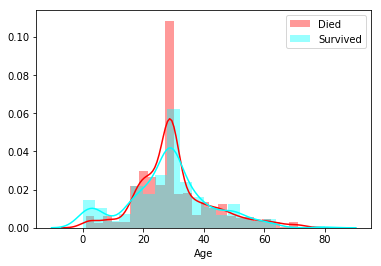

In [131]:
sns.distplot(df_train.loc[df_train['Survived'] == 0]['Age'], color='red', label='Died')
sns.distplot(df_train.loc[df_train['Survived'] == 1]['Age'], color='cyan', label='Survived')
plt.legend()
plt.show()

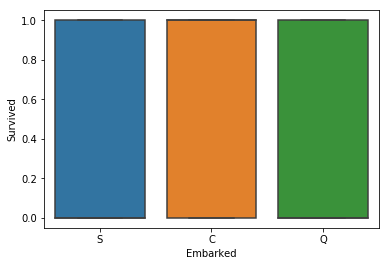

In [138]:
ax = sns.boxplot(x='Embarked', y='Survived', data=df_train)

In [144]:
df_train.groupby('Embarked')['Survived'].mean()

Embarked
C    0.830357
Q    0.584416
S    0.505435
Name: Survived, dtype: float64